In [104]:
import pandas as pd
df = pd.read_excel("komentar_netizen.xlsx")
df.info

<bound method DataFrame.info of                                               Komentar
0          Dosen ketemu pertanyaan y jawabanny bagus,.
1    Coba perhatikan Anies, bukan senyum melaikan A...
2    Waktu kemarin debat pertama menurut saya pak A...
3    Nilai debat kemarin \nPaslon 1 = 120\nPaslom 2...
4    Suka banget lihat percakapan dan bahasa tubuh ...
5                                    Palestina dibawa2
6                                   Pk Prabowo,no 2\n❤
7    Ijin komen, mohon kedepannya komentatornya dig...
8    Saya makin semangat mendukung anis, karna tata...
9    Semakin kau serang prabowo semakin kami nyakin...
10   Pak Prabowo hebat pak jgn terkecoh sama dua Pa...
11   Gua setuju nih sama yang pake kemeja putih kac...
12   Dari 4 menit pembukaan anis, cuma kata kata "f...
13   Man of the Match Pak Ganjar Pranowo...total pe...
14   Kpu tolong waktunya lebih panjng lagi untuk si...
15   Siapa pun presiden ny smoga semakin jaya dan s...
16                               

Tokenizing

In [105]:
import re
import string
from nltk.tokenize import word_tokenize 

# case folding
df['Komentar'] = df['Komentar'].str.lower()

# menghilangkan replies tag username
def hilangkan_tag_username(teks):
    pola_username = r'@@\w+'
    teks_bersih = re.sub(pola_username, '', teks)
    return teks_bersih

df['Komentar'] = df['Komentar'].apply(hilangkan_tag_username)

# remove non ASCII character
def remove_non_ASCII(text):
    return text.encode('ascii', 'replace').decode('ascii')

df['Komentar'] = df['Komentar'].apply(remove_non_ASCII)

# remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)

df['Komentar'] = df['Komentar'].apply(remove_number)

# remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

df['Komentar'] = df['Komentar'].apply(remove_punctuation)

# remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Komentar'] = df['Komentar'].apply(remove_whitespace_LT)

# remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

df['Komentar'] = df['Komentar'].apply(remove_whitespace_multiple)

# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Komentar'] = df['Komentar'].apply(remove_single_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['komentar_tokens'] = df['Komentar'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['komentar_tokens'].head())

Tokenizing Result : 

0        [dosen, ketemu, pertanyaan, jawabanny, bagus]
1    [coba, perhatikan, anies, bukan, senyum, melai...
2    [waktu, kemarin, debat, pertama, menurut, saya...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, dan, bahasa,...
Name: komentar_tokens, dtype: object


<>:42: DeprecationWarning: invalid escape sequence '\s'
<>:42: DeprecationWarning: invalid escape sequence '\s'
C:\Users\ksdar\AppData\Local\Temp\ipykernel_4628\789232704.py:42: DeprecationWarning: invalid escape sequence '\s'
  return re.sub('\s+', ' ', text)


Stopword Removal

In [106]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()

stopwords_indonesian = stopwords.words('indonesian')
stopwords_english = stopwords.words('english')

list_stopwords = stopwords_indonesian + stopwords_english + sastrawi_stopwords


list_stopwords.extend(
    ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 
     'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 
     'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n', 
     't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp', 'yah', 
     'lu', 'gw', 'pa', 'pk', 'jg', 'ttep', 'mef', 'tpat', 'jbol', 'bnr', 
     'kyk', 'mu', 'dlm', 'pret', 'kau', 'tp', 'knp', 'jdi', 'wonng', 'wkwk'
     'paslom', 'kau', 'nyakin', 'jembuttt','bla', 'badazzzz', 'btw', 'bapakkk', 
     'loveee','youuu','yaaa','pakkkkkk', 'dri', 'mksd', 'emhhh', 'fix', 'iyes', 'sok',
     'ato', 'woy', 'taw', 'klw', 'ttp', 'mnt', 'bro', 'byk', 'org', 'uda', 'aj'
     'amoh', 'dr', 'bg', 'bang', 'iya', 'ky', 'aq', 'yak', 'eh', 'phpin', 'ama',
     'ampe', 'hrs', 'oc', 'mak', 'ta', 'gk', 'fak', 'ehh', 'duh', 'lgi', 'sma', 
     'gue', 'gua', 'wooyyyyy', 'udh', 'kek', 'ja', 'wawdaw', 'ps', 'pa', 'ngab',
     'bong', 'bruh', 'lho', 'lur', 'ajj', 'gtu', 'ad', 'seh', 'bu', 'trs', 'mmg',
     'ni', 'mah', 'wkskw', 'bnr', 
    ]
)


# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['komentar_tokens_WSW'] = df['komentar_tokens'].apply(stopwords_removal) 

print(df['komentar_tokens_WSW'].head())

0                    [dosen, ketemu, jawabanny, bagus]
1    [coba, perhatikan, anies, senyum, melaikan, an...
2    [kemarin, debat, anies, bagus, kali, debat, ke...
3    [nilai, debat, kemarin, paslon, paslom, paslon...
4    [suka, banget, lihat, percakapan, bahasa, tubu...
Name: komentar_tokens_WSW, dtype: object


Cleaning the dataset

In [107]:
# Gantikan nilai kosong dengan NaN
df.replace('', pd.NA, inplace=True)

# Gantikan nilai list kosong dengan NaN
df['komentar_tokens_WSW'] = df['komentar_tokens_WSW'].apply(lambda x: pd.NA if not x else x)

# Menghapus baris yang memiliki nilai NaN
df = df.dropna()

# Mereset indeks
df = df.reset_index(drop=True)

# Menampilkan DataFrame setelah perubahan
print(df)

                                              Komentar  \
0             dosen ketemu pertanyaan  jawabanny bagus   
1    coba perhatikan anies bukan senyum melaikan an...   
2    waktu kemarin debat pertama menurut saya pak a...   
3    nilai debat kemarin paslon paslom paslon ini n...   
4    suka banget lihat percakapan dan bahasa tubuh ...   
5                                     palestina dibawa   
6                                         pk prabowono   
7    ijin komen mohon kedepannya komentatornya diga...   
8    saya makin semangat mendukung anis karna tata ...   
9    semakin kau serang prabowo semakin kami nyakin...   
10   pak prabowo hebat pak jgn terkecoh sama dua pa...   
11   gua setuju nih sama yang pake kemeja putih kac...   
12   dari menit pembukaan anis cuma kata kata food ...   
13   man of the match pak ganjar pranowototal penam...   
14   kpu tolong waktunya lebih panjng lagi untuk si...   
15   siapa pun presiden ny smoga semakin jaya dan s...   
16           p

Stemming

In [108]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['komentar_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['komentar_tokens_stemmed'] = df['komentar_tokens_WSW'].swifter.apply(get_stemmed_term)
print(df['komentar_tokens_stemmed'])

1829
------------------------
dosen : dosen
ketemu : ketemu
jawabanny : jawabanny
bagus : bagus
coba : coba
perhatikan : perhati
anies : anies
senyum : senyum
melaikan : lai
mulutnya : mulut
mingkem : mingkem
ngomong : ngomong
doang : doang
kerja : kerja
kemarin : kemarin
debat : debat
kali : kali
ketiga : tiga
setuju : tuju
ganjar : ganjar
unggul : unggul
jawabannya : jawab
nilai : nilai
paslon : paslon
paslom : paslom
tensi : tensi
darah : darah
suka : suka
banget : banget
lihat : lihat
percakapan : cakap
bahasa : bahasa
tubuh : tubuh
baswedan : baswedan
disindir : sindir
bahagia : bahagia
gestur : gestur
adem : adem
seneng : neng
lihatnya : lihat
dunia : dunia
internasional : internasional
palestina : palestina
dibawa : bawa
prabowono : prabowono
ijin : ijin
komen : komen
mohon : mohon
kedepannya : depan
komentatornya : komentator
diganti : ganti
fair : fair
pro : pro
manapun : mana
bahas : bahas
komentator : komentator
kanan : kanan
ngulasnya : ngulasnya
jas : jas
biru : biru
blaka

Pandas Apply:   0%|          | 0/350 [00:00<?, ?it/s]

0                      [dosen, ketemu, jawabanny, bagus]
1      [coba, perhati, anies, senyum, lai, anies, mul...
2      [kemarin, debat, anies, bagus, kali, debat, ti...
3      [nilai, debat, kemarin, paslon, paslom, paslon...
4      [suka, banget, lihat, cakap, bahasa, tubuh, an...
5                                      [palestina, bawa]
6                                            [prabowono]
7      [ijin, komen, mohon, depan, komentator, ganti,...
8      [semangat, dukung, anis, karna, tata, bicara, ...
9           [serang, prabowo, coblos, prabowo, subianto]
10     [prabowo, hebat, kecoh, paslon, suruh, buka, r...
11     [tuju, pake, kemeja, putih, kacamata, anis, ng...
12     [menit, buka, anis, food, estate, kaya, kroni,...
13     [man, match, ganjar, pranowototal, penampilann...
14                         [kpu, panjng, jawab, perinci]
15     [presiden, smoga, jaya, sejahtera, sluruh, rak...
16                        [anis, kedip, mata, kuat, bgt]
17     [tonton, hadir, kampung,

LDA

In [126]:
import gensim
from gensim import corpora

doc_clean = df['komentar_tokens_stemmed']
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
LDA = gensim.models.LdaModel

total_topics = 3 # jumlah topik yang akan di extract
number_words = 15 # jumlah kata per topik

# Running and Trainign LDA model on the document term matrix.
lda_model = LDA(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

topics = lda_model.show_topics(num_topics=total_topics, num_words=number_words, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['anis', 'ganjar', 'prabowo', 'anies', 'presiden', 'paslon', 'orang', 'bukti', 'kerja', 'data', 'indonesia', 'dukung', 'salah', 'rendah', 'fakta']
Topic: 1
Words: ['prabowo', 'debat', 'anis', 'presiden', 'indonesia', 'anies', 'tuju', 'ganjar', 'udah', 'pilih', 'kali', 'kaya', 'usaha', 'nilai', 'beliau']
Topic: 2
Words: ['prabowo', 'anies', 'ngomong', 'orang', 'menang', 'wowo', 'dukung', 'pilih', 'jakarta', 'paslon', 'ganjar', 'negara', 'nis', 'debat', 'rekam']


In [127]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count']) 
print(df_imp_wcount)

         word  topic_id  importance  word_count
0        anis         0    0.024280          72
1      ganjar         0    0.022267          65
2     prabowo         0    0.020956         121
3       anies         0    0.014101          62
4    presiden         0    0.013449          44
5      paslon         0    0.007336          30
6       orang         0    0.006901          31
7       bukti         0    0.006790          23
8       kerja         0    0.006365          25
9        data         0    0.006162          26
10    prabowo         1    0.028072         121
11      debat         1    0.018204          49
12       anis         1    0.012035          72
13   presiden         1    0.009052          44
14  indonesia         1    0.008829          31
15      anies         1    0.007958          62
16       tuju         1    0.006636          12
17     ganjar         1    0.006189          65
18       udah         1    0.006150          17
19      pilih         1    0.005702     

In [128]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.689849962515902

Coherence Score:  0.36262887543781713


In [129]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.044999  0.091798       1        1  39.187516
1     -0.062385 -0.082398       2        1  34.022302
2      0.107384 -0.009401       3        1  26.790182, topic_info=                Term       Freq      Total Category  logprob  loglift
65              anis  53.000000  53.000000  Default  30.0000  30.0000
11           ngomong  16.000000  16.000000  Default  29.0000  29.0000
128         presiden  32.000000  32.000000  Default  28.0000  28.0000
427             wowo   8.000000   8.000000  Default  27.0000  27.0000
14             debat  35.000000  35.000000  Default  26.0000  26.0000
208           menang  10.000000  10.000000  Default  25.0000  25.0000
20              tuju   9.000000   9.000000  Default  24.0000  24.0000
15            ganjar  48.000000  48.000000  Default  23.0000  23.0000
373            usaha   7.000000   7.000000  Default  22.0000  22.0000
532              nis   6.000000   6.000000  Default  21.0000  21.0000
165            rekam   6.000000   6.000000  Default  20.0000  20.0000
163            jejak   6.000000   6.000000  Default  19.0000  19.0000
321           ambisi   7.000000   7.000000  Default  18.0000  18.0000
689           gibran   8.000000   8.000000  Default  17.0000  17.0000
1294           media   4.000000   4.000000  Default  16.0000  16.0000
890           rendah   9.000000   9.000000  Default  15.0000  15.0000
135             kuat   5.000000   5.000000  Default  14.0000  14.0000
214            salah  11.000000  11.000000  Default  13.0000  13.0000
162           bohong   4.000000   4.000000  Default  12.0000  12.0000
565             omon   5.000000   5.000000  Default  11.0000  11.0000
369            rusak   5.000000   5.000000  Default  10.0000  10.0000
387          jakarta  14.000000  14.000000  Default   9.0000   9.0000
23             nilai  10.000000  10.000000  Default   8.0000   8.0000
30            banget  10.000000  10.000000  Default   7.0000   7.0000
89              hati   9.000000   9.000000  Default   6.0000   6.0000
306         langsung   5.000000   5.000000  Default   5.0000   5.0000
198            orang  22.000000  22.000000  Default   4.0000   4.0000
464            dapat   5.000000   5.000000  Default   3.0000   3.0000
1308            akan   3.000000   3.000000  Default   2.0000   2.0000
17              kali  10.000000  10.000000  Default   1.0000   1.0000
689           gibran   7.660896   8.134765   Topic1  -5.3014   0.8768
306         langsung   5.414985   5.907614   Topic1  -5.6484   0.8497
244          politik   4.700049   5.166421   Topic1  -5.7900   0.8422
290              tri   4.695038   5.166222   Topic1  -5.7910   0.8412
234             cari   4.666168   5.165245   Topic1  -5.7972   0.8352
1410       palembang   3.956124   4.424106   Topic1  -5.9623   0.8250
39              suka   3.953803   4.423891   Topic1  -5.9629   0.8245
262           aamiin   3.943737   4.423649   Topic1  -5.9654   0.8220
49              fair   3.914783   4.420530   Topic1  -5.9728   0.8153
1056            beda   3.872200   4.417714   Topic1  -5.9837   0.8050
890           rendah   8.401768   9.595037   Topic1  -5.2091   0.8040
808             milu   3.215733   3.682088   Topic1  -6.1695   0.8014
54             komen   3.215534   3.682070   Topic1  -6.1696   0.8013
32             cakap   3.215531   3.682070   Topic1  -6.1696   0.8013
1256         diskusi   3.215511   3.682068   Topic1  -6.1696   0.8013
428             gaji   3.215377   3.682056   Topic1  -6.1696   0.8013
1307           etika   3.215325   3.682055   Topic1  -6.1696   0.8013
800           jokowi   3.215003   3.682023   Topic1  -6.1697   0.8012
1165          jateng   3.202992   3.681597   Topic1  -6.1735   0.7976
272            wakil   3.199899   3.681523   Topic1  -6.1744   0.7966
231              aku   3.195235   3.681373   Topic1  -6.1759   0.7952
1197          pegang   2.473582   2.939921   To

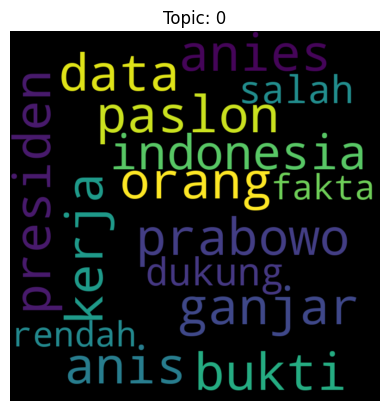

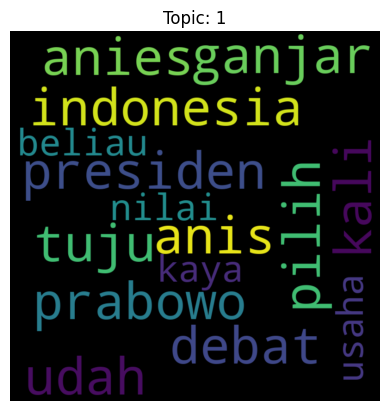

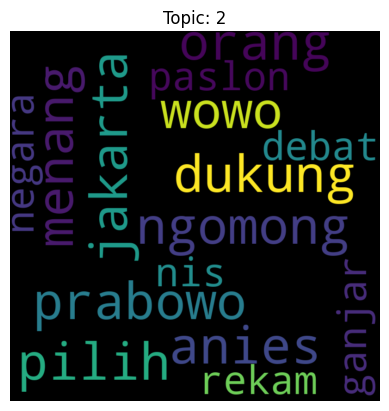

In [130]:
# Plotting a wordcloud of the topics

from wordcloud import WordCloud 
import matplotlib.pyplot as plt

# Plotting a word cloud of the topics
for topic_id, topic in enumerate(lda_model.print_topics(num_topics=total_topics, num_words=number_words)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()